In [1]:
import cv2
import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
# Loading the built-in facial extraction

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [3]:
# Defining the initial file location

path1 = "Dataset/Train/Fake/*.*"
path2 = "Dataset/Train/Real/*.*"
path3 = "Dataset/Validation/Fake/*.*"
path4 = "Dataset/Validation/Real/*.*"
path5 = "Dataset/Test/Fake/*.*"
path6 = "Dataset/Test/Real/*.*"

In [4]:
# Generate lists of file paths that match specific patterns defined by the paths

img_list1 = glob.glob(path1)
img_list2 = glob.glob(path2)
img_list3 = glob.glob(path3)
img_list4 = glob.glob(path4)
img_list5 = glob.glob(path5)
img_list6 = glob.glob(path6)

In [5]:
# Defining the output directories and create one if not already exist

output_dir1 = "Extracted/Train/Fake"
output_dir2 = "Extracted/Train/Real"
output_dir3 = "Extracted/Validation/Fake"
output_dir4 = "Extracted/Validation/Real"
output_dir5 = "Extracted/Test/Fake"
output_dir6 = "Extracted/Test/Real"

os.makedirs(output_dir1, exist_ok=True)
os.makedirs(output_dir2, exist_ok=True)
os.makedirs(output_dir3, exist_ok=True)
os.makedirs(output_dir4, exist_ok=True)
os.makedirs(output_dir5, exist_ok=True)
os.makedirs(output_dir6, exist_ok=True)

In [6]:
# Initialize the img_number

img_number = 0

In [7]:
# Looping over the images, read each image and grayscale them, use built in function to detect faces, save extracted image

# for file in img_list1[0:70000]:
#     print(file)
#     img = cv2.imread(file, 1)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x, y, w, h) in faces:
#         try:
#             roi_color = img[y:y+h, x:x+w]
#             resized = cv2.resize(roi_color, (256, 256))
#             file_name = os.path.splitext(os.path.basename(file))[0]
#             cv2.imwrite(output_dir1 + "/" + file_name + ".jpg", resized)
#             img_number += 1
#         except:
#             print("Error processing face in:", file)

In [8]:
# for file in img_list2[0:70000]:
#     print(file)
#     img = cv2.imread(file, 1)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x, y, w, h) in faces:
#         try:
#             roi_color = img[y:y+h, x:x+w]
#             resized = cv2.resize(roi_color, (256, 256))
#             file_name = os.path.splitext(os.path.basename(file))[0]
#             cv2.imwrite(output_dir2 + "/" + file_name + ".jpg", resized)
#             img_number += 1
#         except:
#             print("Error processing face in:", file)

In [9]:
# for file in img_list3[0:70000]:
#     print(file)
#     img = cv2.imread(file, 1)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x, y, w, h) in faces:
#         try:
#             roi_color = img[y:y+h, x:x+w]
#             resized = cv2.resize(roi_color, (256, 256))
#             file_name = os.path.splitext(os.path.basename(file))[0]
#             cv2.imwrite(output_dir3 + "/" + file_name + ".jpg", resized)
#             img_number += 1
#         except:
#             print("Error processing face in:", file)

In [10]:
# for file in img_list4[0:70000]:
#     print(file)
#     img = cv2.imread(file, 1)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x, y, w, h) in faces:
#         try:
#             roi_color = img[y:y+h, x:x+w]
#             resized = cv2.resize(roi_color, (256, 256))
#             file_name = os.path.splitext(os.path.basename(file))[0]
#             cv2.imwrite(output_dir4 + "/" + file_name + ".jpg", resized)
#             img_number += 1
#         except:
#             print("Error processing face in:", file)

In [11]:
# for file in img_list5[0:70000]:
#     print(file)
#     img = cv2.imread(file, 1)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x, y, w, h) in faces:
#         try:
#             roi_color = img[y:y+h, x:x+w]
#             resized = cv2.resize(roi_color, (256, 256))
#             file_name = os.path.splitext(os.path.basename(file))[0]
#             cv2.imwrite(output_dir5 + "/" + file_name + ".jpg", resized)
#             img_number += 1
#         except:
#             print("Error processing face in:", file)

In [12]:
# for file in img_list6[0:70000]:
#     print(file)
#     img = cv2.imread(file, 1)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
#     faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     for (x, y, w, h) in faces:
#         try:
#             roi_color = img[y:y+h, x:x+w]
#             resized = cv2.resize(roi_color, (256, 256))
#             file_name = os.path.splitext(os.path.basename(file))[0]
#             cv2.imwrite(output_dir6 + "/" + file_name + ".jpg", resized)
#             img_number += 1
#         except:
#             print("Error processing face in:", file)

In [14]:
# Define directories for train, validation, test, list all files/directories in the folders

train_dir = 'Extracted/Train'
val_dir = 'Extracted/Validation'
test_dir = 'Extracted/Test'

os.listdir(train_dir)
os.listdir(val_dir)
os.listdir(test_dir)

['Fake', 'Real']

In [15]:
# Create dataset for each directory, images loaded in a batch of 32, resize to 256 * 256 

train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=32, image_size=(256, 256))
val_data = tf.keras.utils.image_dataset_from_directory(val_dir, batch_size=32, image_size=(256, 256))
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, batch_size=32, image_size=(256, 256))

Found 101771 files belonging to 2 classes.
Found 28141 files belonging to 2 classes.
Found 7223 files belonging to 2 classes.


In [16]:
# Normalizing the data by scaling the pixel value

train_data = train_data.map(lambda x, y: (x/255, y))
val_data = val_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

In [17]:
# Create iterators

train_data_iterator = train_data.as_numpy_iterator()
val_data_iterator = val_data.as_numpy_iterator()
test_data_iterator = test_data.as_numpy_iterator()

In [18]:
# Fetch the next batch of data

train_batch = train_data_iterator.next()
val_batch = val_data_iterator.next()
test_batch = test_data_iterator.next()

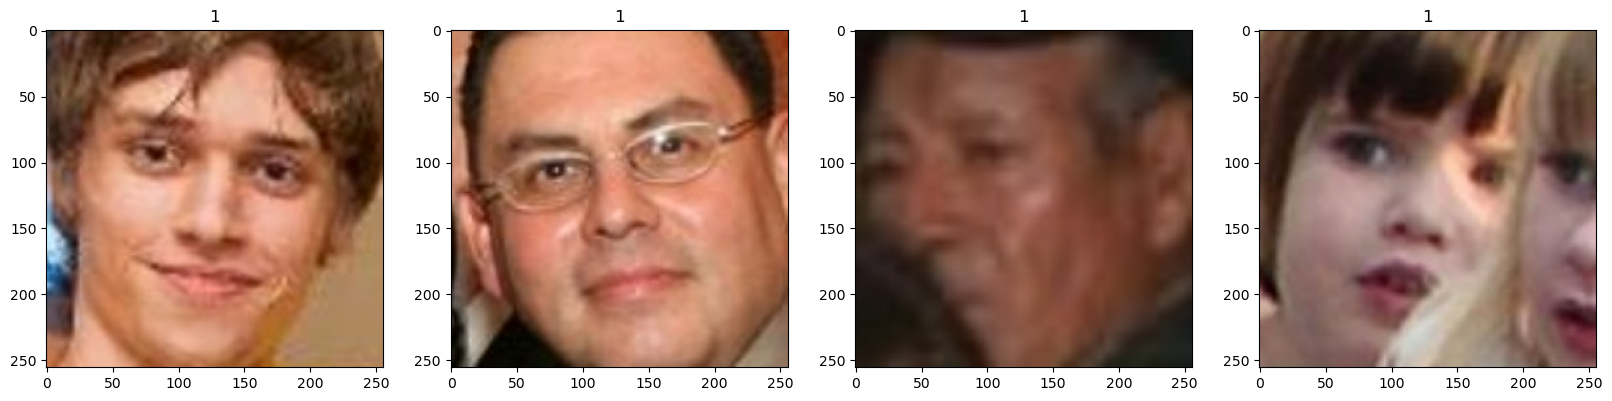

In [19]:
# Image visualization with corresponding labels

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(train_batch[1][idx])
plt.show()

In [20]:
# Model architecture

model = Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [21]:
# Identify optimizer, loss for binary classification task, and evaluation metrics

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      14,745,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,769,697 (56.34 MB)

 Trainable params: 14,769,697 (56.34 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Visualize the model's training and performance

logdir = 'Logs'
tensorboard_callback = TensorBoard(log_dir=logdir)

In [24]:
#early_stopping_callback = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [25]:
# model training

history = model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2890s 908ms/step - accuracy: 0.7979 - loss: 0.4176 - val_accuracy: 0.9117 - val_loss: 0.2339
Epoch 2/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2885s 907ms/step - accuracy: 0.9328 - loss: 0.1804 - val_accuracy: 0.9147 - val_loss: 0.2404
Epoch 3/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2879s 905ms/step - accuracy: 0.9560 - loss: 0.1216 - val_accuracy: 0.9169 - val_loss: 0.2621
Epoch 4/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2882s 906ms/step - accuracy: 0.9693 - loss: 0.0840 - val_accuracy: 0.9162 - val_loss: 0.3480
Epoch 5/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2895s 910ms/step - accuracy: 0.9779 - loss: 0.0590 - val_accuracy: 0.9081 - val_loss: 0.3833
Epoch 6/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2891s 909ms/step - accuracy: 0.9832 - loss: 0.0474 - val_accuracy: 0.9116 - val_loss: 0.5393
Epoch 7/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2895s 910ms/step - accuracy: 0.9872 - loss: 0.0372 - val_accuracy: 0.9107 - val_loss: 0.4233
Epoch 8/20
3181/3181 ━━━━━━━━━━━━━━━━━━━━ 2892s 909ms/s

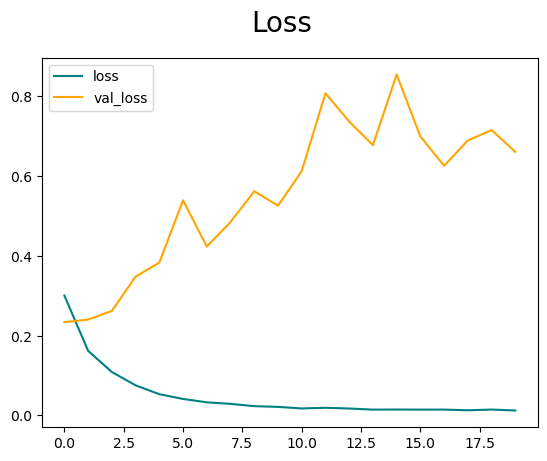

In [27]:
# Loss visualization

fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

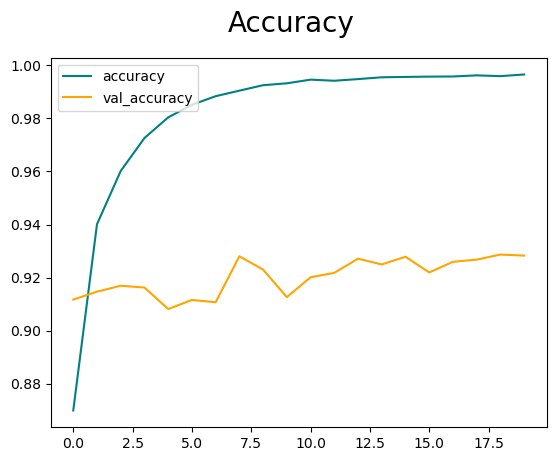

In [28]:
# Accuracy visualization

fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
# Update metrics 

for batch in test_data.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


In [48]:
# Metrics statistics

print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8867128491401672, Recall: 0.7921938300132751, Accuracy: 0.8410632610321045


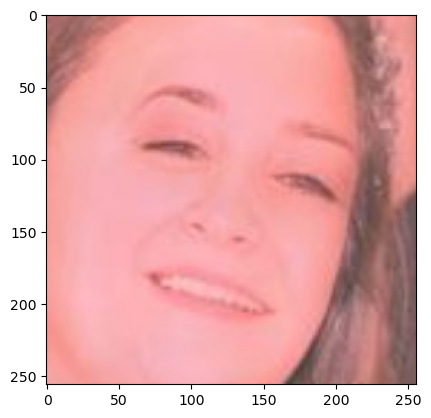

In [32]:
# Image reading

img_path = 'Extracted/Test/Fake'
target_image1 = 'fake_61.jpg'
target_image_path = os.path.join(img_path, target_image1)
if os.path.exists(target_image_path):
    img = cv2.imread(target_image_path)
    
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("Failed to read the image:", target_image_path)
else:
    print("Target image does not exist:", target_image_path)

In [35]:
# Model testing

yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [36]:
yhat

array([[8.0541014e-08]], dtype=float32)

In [37]:
# Decision threshold of 0.5

if yhat > 0.5:
    print(f'This person is predicted to be real')
else:
    print(f'This person is predicted to be AI generated')

This person is predicted to be AI generated


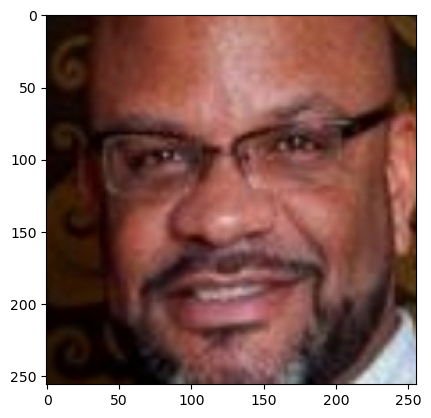

In [38]:
# Image reading

img_path = 'Extracted/Test/Real'
target_image2 = 'real_7.jpg'
target_image_path = os.path.join(img_path, target_image2)
if os.path.exists(target_image_path):
    img = cv2.imread(target_image_path)
    
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("Failed to read the image:", target_image_path)
else:
    print("Target image does not exist:", target_image_path)

In [39]:
# Model testing

yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [40]:
yhat

array([[0.9999998]], dtype=float32)

In [41]:
# Decision threshold

if yhat > 0.5:
    print(f'This person is predicted to be real')
else:
    print(f'This person is predicted to be AI generated')

This person is predicted to be real


In [43]:
# Save the model

model.save(os.path.join('Models','DeepFakeImageDetector.keras'))

In [44]:
# Re-load the model

new_model = load_model(os.path.join('Models','DeepFakeImageDetector.keras'))

C:\Users\yuqin\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [45]:
# Re-predict

yhatnew = new_model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [46]:
if yhatnew > 0.5:
    print(f'This person is predicted to be real')
else:
    print(f'This person is predicted to be AI generated')

This person is predicted to be real
